In [1]:
! pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
      

Passar no pipeline qual model queremos usar;
Pipeline suporta, iamges, audio, nlp, so much languages;
Sentiment analysis, summarization, audio classification;

In [2]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [18]:
import pandas as pd

df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/LIS/HuggingFace/LabeledText.xlsx")

In [19]:
df.head()

,File Name,Caption,LABEL
0,1.txt,How I feel today #legday #jelly #aching #gym,negative
1,10.txt,@ArrivaTW absolute disgrace two carriages from...,negative
2,100.txt,This is my Valentine's from 1 of my nephews. I...,positive
3,1000.txt,betterfeelingfilms: RT via Instagram: First da...,neutral
4,1001.txt,Zoe's first love #Rattled @JohnnyHarper15,positive


In [20]:
df = df.drop(columns=['File Name', 'LABEL'])

In [36]:
df_results = pd.DataFrame(columns=["Caption", "Label", "Score"])

In [37]:
captions = []
labels = []
scores = []

for tweet in df['Caption']:
    captions.append(tweet)
    labels.append(classifier(tweet)[0]['label'])
    scores.append(classifier(tweet)[0]['score'])

In [38]:
df_results['Caption'] = captions
df_results['Label'] = labels
df_results['Score'] = scores

In [39]:
df_results.head()

,Caption,Label,Score
0,How I feel today #legday #jelly #aching #gym,POSITIVE,0.794531
1,@ArrivaTW absolute disgrace two carriages from...,NEGATIVE,0.999707
2,This is my Valentine's from 1 of my nephews. I...,POSITIVE,0.999846
3,betterfeelingfilms: RT via Instagram: First da...,NEGATIVE,0.990201
4,Zoe's first love #Rattled @JohnnyHarper15,NEGATIVE,0.950077


Data Analysis

In [40]:
! pip install matplotlib

In [42]:
import matplotlib.pyplot as plt

In [76]:
label_counts = df_results['Label'].value_counts()
label_counts

,count
Label,
NEGATIVE,3429
POSITIVE,1440


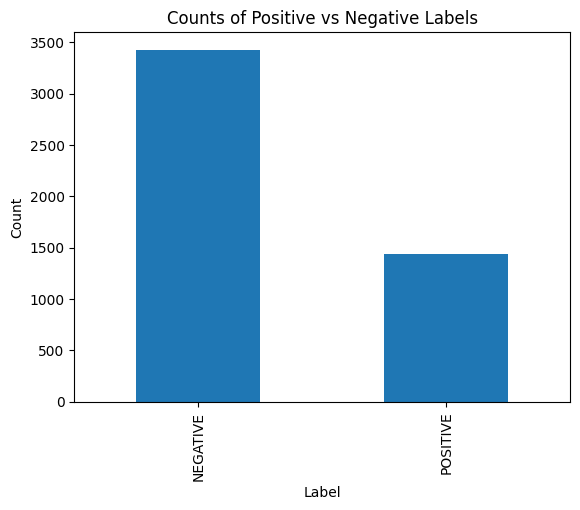

In [77]:
label_counts.plot(kind='bar')
plt.title('Counts of Positive vs Negative Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

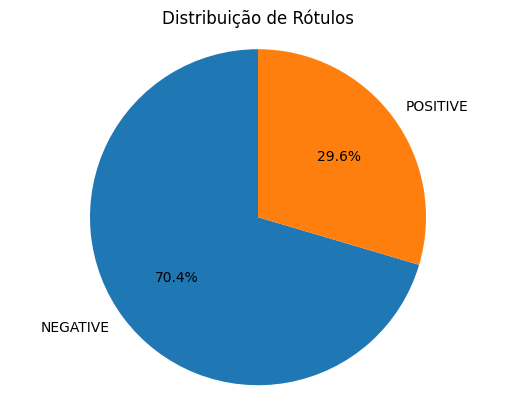

In [78]:
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Rótulos')
plt.axis('equal')
plt.show()

In [35]:
df_results.to_csv('df_results.csv', index=False)

from google.colab import files
files.download('df_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>